# AIRCRAFTS FOR COMMERCIAL AND PRIVATE ENTERPRISES PROJECT
## Project Aim
The main objective of this data analysis project is to determine the lowest risk aircraft to purchase.

### Specific Objectives

- Identify private aircrafts with lowest risk for purchase
- Identify commercial aircrafts with lowest risk to purchase.
  
### Key Factor
The key factor that contribute to the risk of purchasing an aircraft is the aircraft's accident history

### Importance of assessing risk in aircraft purchases
Assessing risk is crucial in aircraft purchases as it can help buyers(the company) make informed decisions, avoid costly repairs, and ensure the safety of passengers and crew.

### Hypothesis
What are the characteristics of the lowest risk aircraft to purchase, and how do these characteristics impact the overall risk of ownership?

### Scope of the Project
This analysis will focus on historical data from aviation databases, including accident reports.

### Methodology
The analysis will involve descriptive statistics and data visualization.

### Expected Outcome of This Data Analysis Project
The expected outcome of this analysis is to identify the lowest risk aircraft to purchase, based on a comprehensive evaluation of the key factors that contribute to risk, and to provide recommendations for buyers seeking to minimize their risk exposure.

### Data Source and Data Exploration
This data comes from Kaggle competition ( datasetLinks to an external site) from the National 
Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents
and selected incidents in the United States and international waters.

I used 9 columns for my analysis, which included variables about;

  - Injury.Severity
  - Make
  - Model
  - Purpose.of.flight
  - Total.Fatal.Injuries
  - Total.Serious.Injuries
  - Total.Minor.Injuries
  - Total.Uninjured renamed to Aircraft_Capacity
  - Aircraft_model created from joining Make and Model variables.
    
The main features that I considered using for the Final results are;

  - Aircraft_Capacity
  - Aircraft_model
    
### Data science audience 
This is a person(people) with basic data science proficiency.

## Importing Required Libraries and Loading The Data for This Project

In [1]:
# Importing the libraries to use in this project
import pandas as pd       # for data cleaning
import numpy as np
from numbers import Number
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt    # for plotting graphs
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv("AviationData.csv", encoding="Latin", low_memory=False)

### Investigating The DataFrame

In [3]:
df.head()     # first 5 rows of the DataFrame

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
df.tail()    # last 5 rows of the DataFrame

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [5]:
df.info()     # summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
df.shape     # shape of the DataFrame(number of rows and columns)

(88889, 31)

## DATA CLEANING AND ANALYSIS
###  Filter Data to Relevant Columns

In [7]:
# selectin relevant columns to this project
relevant_columns = [
    "Injury.Severity",
    "Make",
    "Model",
    "Purpose.of.flight",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured"
]

In [8]:
df = df[relevant_columns]    
df

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Fatal(2),Stinson,108-3,Personal,2.0,0.0,0.0,0.0
1,Fatal(4),Piper,PA24-180,Personal,4.0,0.0,0.0,0.0
2,Fatal(3),Cessna,172M,Personal,3.0,NaN,NaN,NaN
3,Fatal(2),Rockwell,112,Personal,2.0,0.0,0.0,0.0
4,Fatal(1),Cessna,501,Personal,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...
88884,Minor,PIPER,PA-28-151,Personal,0.0,1.0,0.0,0.0
88885,NaN,BELLANCA,7ECA,NaN,0.0,0.0,0.0,0.0
88886,Non-Fatal,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,0.0,0.0,0.0,1.0
88887,NaN,CESSNA,210N,Personal,0.0,0.0,0.0,0.0


### Filter Data to Relevant Rows
#### We select rows with Business in "Purpose.of.flight" column since the company is diversifying its business portfolio.

In [9]:
df = df.loc[df['Purpose.of.flight'] == "Business"]    # modify df to only contain rows where Purpose.of.flight is "Business"
df

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
8,Non-Fatal,Cessna,401B,Business,0.0,0.0,0.0,2.0
25,Fatal(8),Cessna,414A,Business,8.0,0.0,0.0,0.0
36,Fatal(1),Cessna,206,Business,1.0,0.0,1.0,0.0
37,Fatal(3),Navion,A,Business,3.0,0.0,0.0,0.0
40,Incident,Rockwell,114,Business,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
88765,Fatal,PIPER,PA46-500TP,Business,2.0,0.0,0.0,0.0
88786,Minor,FAIRCHILD,SA227-AT,Business,0.0,2.0,0.0,1.0
88804,Non-Fatal,CESSNA,207,Business,0.0,0.0,0.0,7.0
88834,Minor,LEARJET INC,45,Business,0.0,2.0,0.0,6.0


#### We select Incident since it has not caused injury

In [10]:
df = df.loc[df['Injury.Severity'] == "Incident"]   # modify df to only contain rows where Injury.Severity is "Incident"
df

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
40,Incident,Rockwell,114,Business,0.0,0.0,0.0,1.0
1164,Incident,Gates Learjet,24B,Business,NaN,NaN,NaN,3.0
2252,Incident,Mitsubishi,MU-2B-25,Business,0.0,0.0,0.0,2.0
2394,Incident,Cessna,421B,Business,0.0,0.0,1.0,0.0
2766,Incident,Piper,PA-34-22OT,Business,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
62497,Incident,Dassault-breguet,Mystere Falcon 20-F5,Business,NaN,NaN,NaN,7.0
62647,Incident,Learjet,36,Business,NaN,NaN,NaN,2.0
63182,Incident,Piper,PA-32R-301T,Business,0.0,0.0,0.0,1.0
63443,Incident,Beech,C90A,Business,NaN,NaN,NaN,8.0


In [11]:
df = df.loc[df['Total.Fatal.Injuries'] == 0.0]      # removing data with fatalities and injuries
df = df.loc[df['Total.Serious.Injuries'] == 0.0]
df = df.loc[df['Total.Minor.Injuries'] == 0.0]
df = df.loc[df['Total.Uninjured'] >= 4.0]          # selecting business aircrafts with 4 or more passengers in our dataframe
df

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
3811,Incident,Mitsubishi,MU-2B-36,Business,0.0,0.0,0.0,7.0
4035,Incident,Cessna,401,Business,0.0,0.0,0.0,6.0
4875,Incident,Boeing Vertol,234ER,Business,0.0,0.0,0.0,19.0
6907,Incident,Cessna,421B,Business,0.0,0.0,0.0,127.0
9692,Incident,Dassault/sud,FAN JET FALCON,Business,0.0,0.0,0.0,5.0
9881,Incident,Beech,A36TC,Business,0.0,0.0,0.0,4.0
10008,Incident,Cessna,CITATION 550,Business,0.0,0.0,0.0,44.0
11104,Incident,Piper,PA-44-180,Business,0.0,0.0,0.0,158.0
15976,Incident,Mitsubishi,MU-300IA,Business,0.0,0.0,0.0,4.0
16109,Incident,Boeing,727-22C,Business,0.0,0.0,0.0,115.0


### Dropping Duplicate Rows

In [12]:
df.drop_duplicates(inplace=True)
df

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
3811,Incident,Mitsubishi,MU-2B-36,Business,0.0,0.0,0.0,7.0
4035,Incident,Cessna,401,Business,0.0,0.0,0.0,6.0
4875,Incident,Boeing Vertol,234ER,Business,0.0,0.0,0.0,19.0
6907,Incident,Cessna,421B,Business,0.0,0.0,0.0,127.0
9692,Incident,Dassault/sud,FAN JET FALCON,Business,0.0,0.0,0.0,5.0
9881,Incident,Beech,A36TC,Business,0.0,0.0,0.0,4.0
10008,Incident,Cessna,CITATION 550,Business,0.0,0.0,0.0,44.0
11104,Incident,Piper,PA-44-180,Business,0.0,0.0,0.0,158.0
15976,Incident,Mitsubishi,MU-300IA,Business,0.0,0.0,0.0,4.0
16109,Incident,Boeing,727-22C,Business,0.0,0.0,0.0,115.0


### Renaming a Column

In [13]:
df.rename(columns = {"Total.Uninjured" : "Aircraft_Capacity"}, inplace = True)  # assumed total uninjured reprecent the full capacity
df                                                                              # since none is injured in our current data

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity
3811,Incident,Mitsubishi,MU-2B-36,Business,0.0,0.0,0.0,7.0
4035,Incident,Cessna,401,Business,0.0,0.0,0.0,6.0
4875,Incident,Boeing Vertol,234ER,Business,0.0,0.0,0.0,19.0
6907,Incident,Cessna,421B,Business,0.0,0.0,0.0,127.0
9692,Incident,Dassault/sud,FAN JET FALCON,Business,0.0,0.0,0.0,5.0
9881,Incident,Beech,A36TC,Business,0.0,0.0,0.0,4.0
10008,Incident,Cessna,CITATION 550,Business,0.0,0.0,0.0,44.0
11104,Incident,Piper,PA-44-180,Business,0.0,0.0,0.0,158.0
15976,Incident,Mitsubishi,MU-300IA,Business,0.0,0.0,0.0,4.0
16109,Incident,Boeing,727-22C,Business,0.0,0.0,0.0,115.0


### Creating A New Column

In [14]:
Aircraft_model = df["Make"] + df["Model"]
df.loc[:, "Aircraft_model"] = Aircraft_model  # creating a new column by joining make and model columns
df

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity,Aircraft_model
3811,Incident,Mitsubishi,MU-2B-36,Business,0.0,0.0,0.0,7.0,MitsubishiMU-2B-36
4035,Incident,Cessna,401,Business,0.0,0.0,0.0,6.0,Cessna401
4875,Incident,Boeing Vertol,234ER,Business,0.0,0.0,0.0,19.0,Boeing Vertol234ER
6907,Incident,Cessna,421B,Business,0.0,0.0,0.0,127.0,Cessna421B
9692,Incident,Dassault/sud,FAN JET FALCON,Business,0.0,0.0,0.0,5.0,Dassault/sudFAN JET FALCON
9881,Incident,Beech,A36TC,Business,0.0,0.0,0.0,4.0,BeechA36TC
10008,Incident,Cessna,CITATION 550,Business,0.0,0.0,0.0,44.0,CessnaCITATION 550
11104,Incident,Piper,PA-44-180,Business,0.0,0.0,0.0,158.0,PiperPA-44-180
15976,Incident,Mitsubishi,MU-300IA,Business,0.0,0.0,0.0,4.0,MitsubishiMU-300IA
16109,Incident,Boeing,727-22C,Business,0.0,0.0,0.0,115.0,Boeing727-22C


In [15]:
df = df.sort_values("Aircraft_Capacity", ascending = False) # sort the values of aircraft capacity in descending order
df

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity,Aircraft_model
20258,Incident,Piper,PA-42-720,Business,0.0,0.0,0.0,274.0,PiperPA-42-720
11104,Incident,Piper,PA-44-180,Business,0.0,0.0,0.0,158.0,PiperPA-44-180
6907,Incident,Cessna,421B,Business,0.0,0.0,0.0,127.0,Cessna421B
19868,Incident,Gates Learjet,24E,Business,0.0,0.0,0.0,123.0,Gates Learjet24E
16109,Incident,Boeing,727-22C,Business,0.0,0.0,0.0,115.0,Boeing727-22C
43511,Incident,Boeing,737-205,Business,0.0,0.0,0.0,81.0,Boeing737-205
10008,Incident,Cessna,CITATION 550,Business,0.0,0.0,0.0,44.0,CessnaCITATION 550
46770,Incident,Beech,C90A,Business,0.0,0.0,0.0,22.0,BeechC90A
4875,Incident,Boeing Vertol,234ER,Business,0.0,0.0,0.0,19.0,Boeing Vertol234ER
19802,Incident,Piper,PA-31T,Business,0.0,0.0,0.0,17.0,PiperPA-31T


In [16]:
df.shape     # shape of the new dataframe

(29, 9)

In [17]:
df.describe()     # statistics

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity
count,29.0,29.0,29.0,29.000000
mean,0.0,0.0,0.0,37.482759
std,0.0,0.0,0.0,63.850618
min,0.0,0.0,0.0,4.000000
25%,0.0,0.0,0.0,4.000000
50%,0.0,0.0,0.0,6.000000
75%,0.0,0.0,0.0,22.000000
max,0.0,0.0,0.0,274.000000


## DATA VISUALIZATION

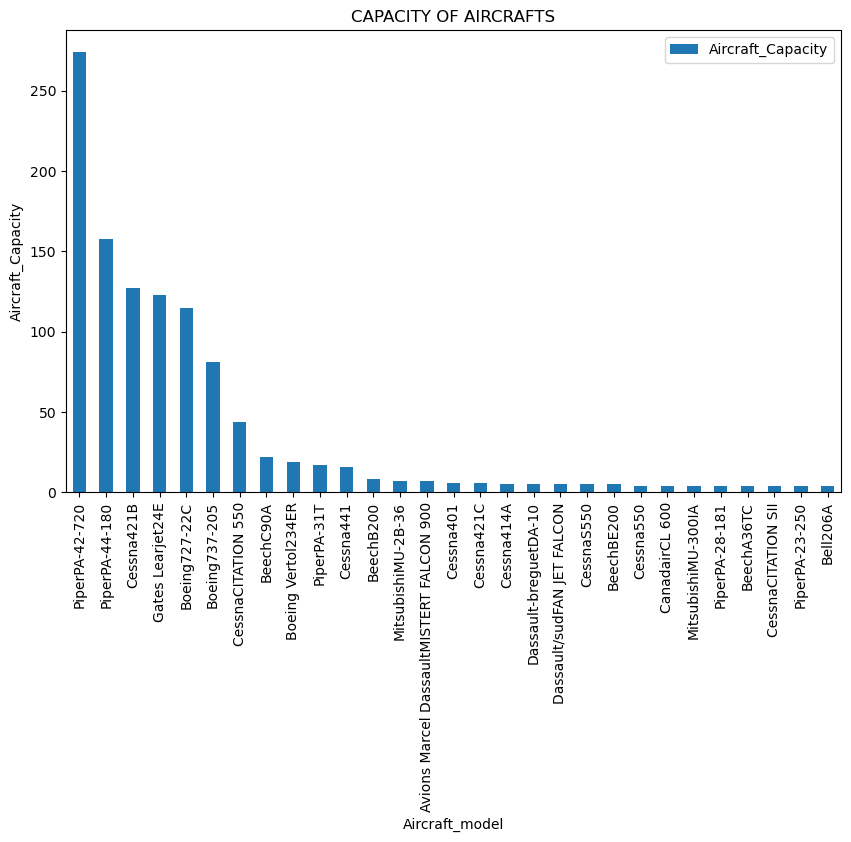

In [18]:
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (10, 6)
df.plot.bar(X, Y)
plt.title("CAPACITY OF AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.ylabel("Aircraft_Capacity")
plt.show()

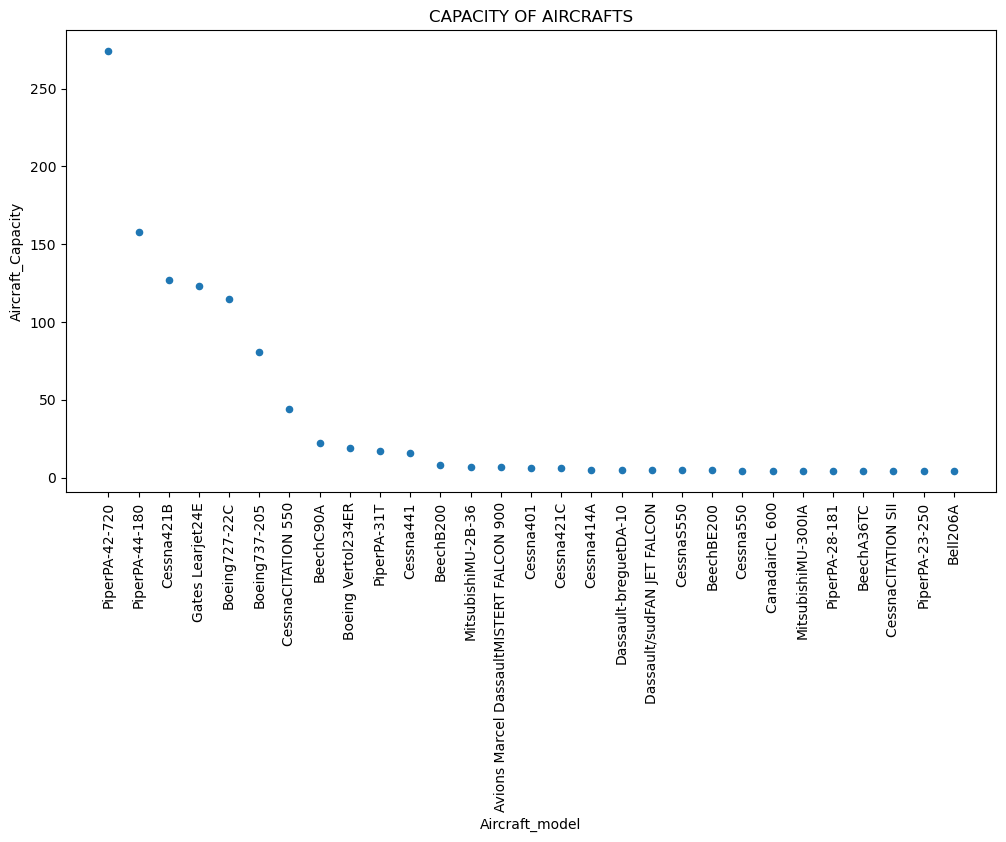

In [19]:
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (12,6)
df.plot.scatter(X, Y)
plt.title("CAPACITY OF AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.xticks(rotation=90)
plt.ylabel("Aircraft_Capacity")
plt.show()

### Small_Private_Aircraft

In [20]:
Small_Private_Aircraft = df.loc[df["Aircraft_Capacity"].isin([4,5,6])]      # small aircrafts to be considered for private enterprises
Small_Private_Aircraft

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity,Aircraft_model
4035,Incident,Cessna,401,Business,0.0,0.0,0.0,6.0,Cessna401
27469,Incident,Cessna,421C,Business,0.0,0.0,0.0,6.0,Cessna421C
33677,Incident,Cessna,414A,Business,0.0,0.0,0.0,5.0,Cessna414A
19528,Incident,Dassault-breguet,DA-10,Business,0.0,0.0,0.0,5.0,Dassault-breguetDA-10
9692,Incident,Dassault/sud,FAN JET FALCON,Business,0.0,0.0,0.0,5.0,Dassault/sudFAN JET FALCON
20303,Incident,Cessna,S550,Business,0.0,0.0,0.0,5.0,CessnaS550
34705,Incident,Beech,BE200,Business,0.0,0.0,0.0,5.0,BeechBE200
45526,Incident,Cessna,550,Business,0.0,0.0,0.0,4.0,Cessna550
36242,Incident,Canadair,CL 600,Business,0.0,0.0,0.0,4.0,CanadairCL 600
15976,Incident,Mitsubishi,MU-300IA,Business,0.0,0.0,0.0,4.0,MitsubishiMU-300IA


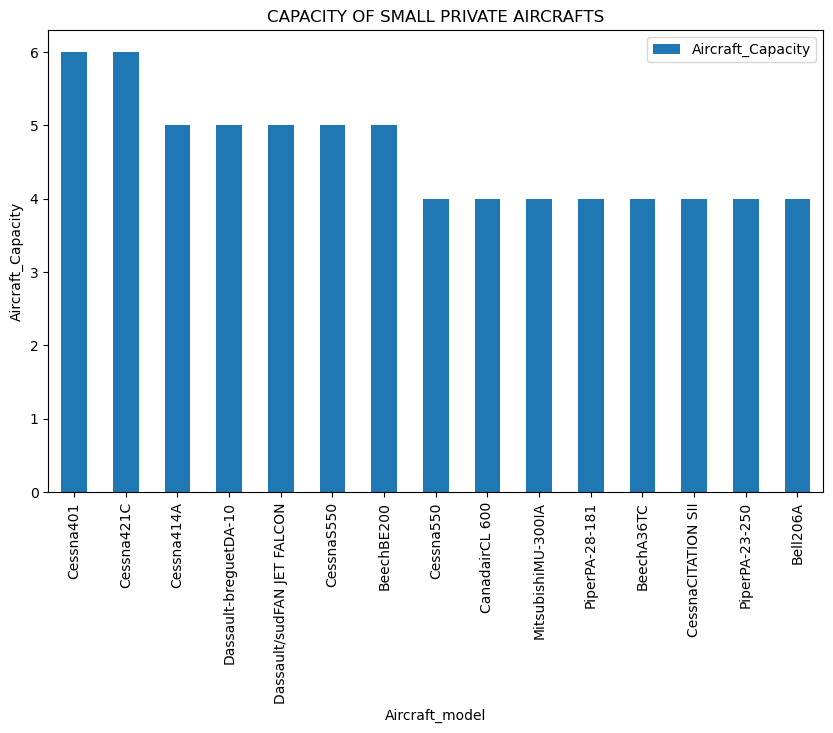

In [21]:
# Bar chart for small private aircrafts
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (10, 6)
Small_Private_Aircraft.plot.bar(X, Y)
plt.title("CAPACITY OF SMALL PRIVATE AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.ylabel("Aircraft_Capacity")
plt.show()

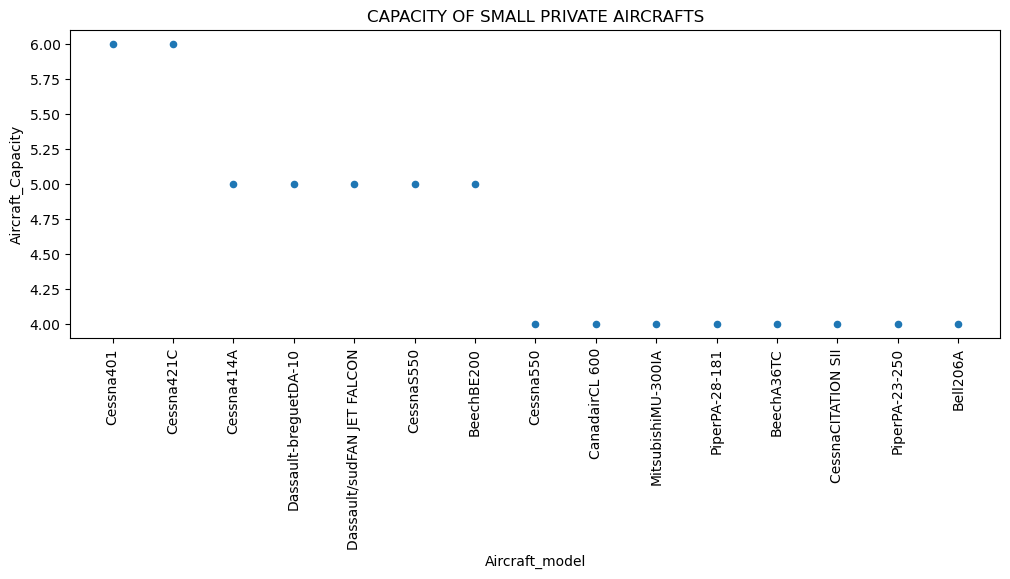

In [22]:
# Scatter plots for small private aircrafts
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (12, 4)
Small_Private_Aircraft.plot.scatter(X, Y)
plt.title("CAPACITY OF SMALL PRIVATE AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.xticks(rotation=90)
plt.ylabel("Aircraft_Capacity")
plt.show()

## Midsize_Private_Aircraft

In [23]:
Midsize_Private_Aircraft = df.loc[df["Aircraft_Capacity"].isin([7,8,9,10])]  # midsize aircrafts to be considered for private enterprises
Midsize_Private_Aircraft

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity,Aircraft_model
28615,Incident,Beech,B200,Business,0.0,0.0,0.0,8.0,BeechB200
3811,Incident,Mitsubishi,MU-2B-36,Business,0.0,0.0,0.0,7.0,MitsubishiMU-2B-36
27443,Incident,Avions Marcel Dassault,MISTERT FALCON 900,Business,0.0,0.0,0.0,7.0,Avions Marcel DassaultMISTERT FALCON 900


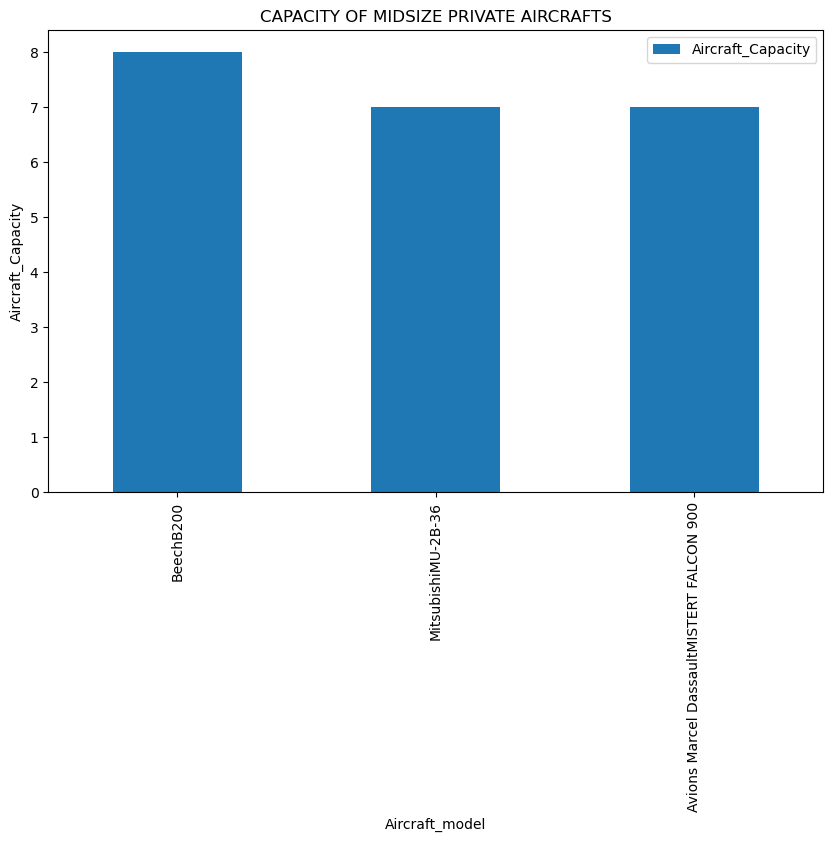

In [24]:
# Bar chart for midsize private aircrafts
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (10, 6)
Midsize_Private_Aircraft.plot.bar(X, Y)
plt.title("CAPACITY OF MIDSIZE PRIVATE AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.ylabel("Aircraft_Capacity")
plt.show()

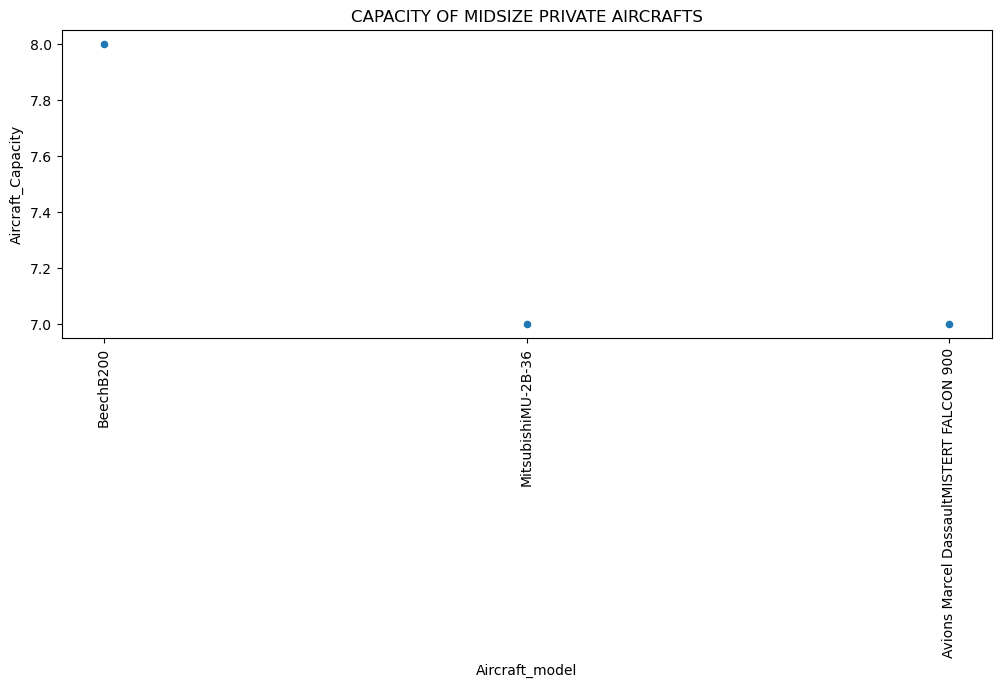

In [25]:
# Scatter plots for midsize private aircrafts
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (12, 4)
Midsize_Private_Aircraft.plot.scatter(X, Y)
plt.title("CAPACITY OF MIDSIZE PRIVATE AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.xticks(rotation=90)
plt.ylabel("Aircraft_Capacity")
plt.show()

## Large_Private_Aircraft

In [26]:
Large_Private_Aircraft = df.loc[df["Aircraft_Capacity"].isin([11,12,13,14,15,16,17,18,19,20])]
Large_Private_Aircraft                                              # large aircrafts to be considered for private enterprises

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity,Aircraft_model
4875,Incident,Boeing Vertol,234ER,Business,0.0,0.0,0.0,19.0,Boeing Vertol234ER
19802,Incident,Piper,PA-31T,Business,0.0,0.0,0.0,17.0,PiperPA-31T
19666,Incident,Cessna,441,Business,0.0,0.0,0.0,16.0,Cessna441


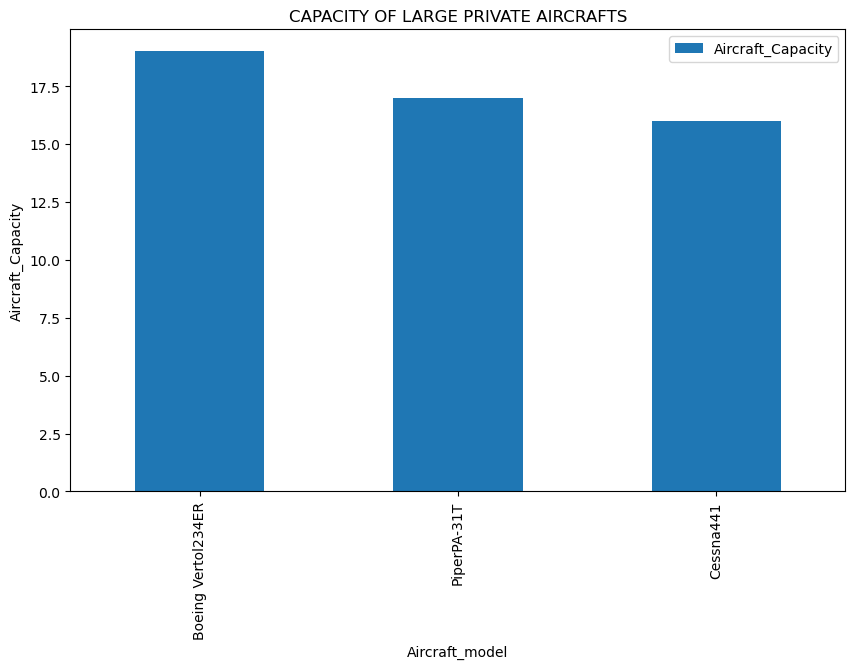

In [27]:
# Bar chart for large private aircrafts
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (10, 6)
Large_Private_Aircraft.plot.bar(X, Y)
plt.title("CAPACITY OF LARGE PRIVATE AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.ylabel("Aircraft_Capacity")
plt.show()

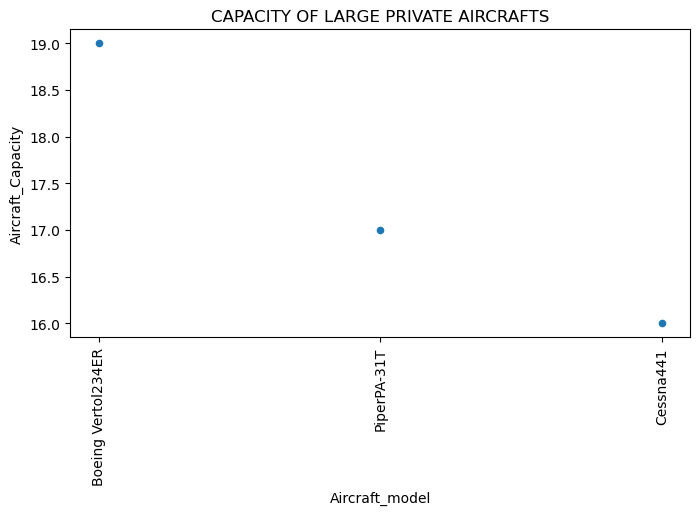

In [28]:
# Scatter plots for large private aircrafts
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (8, 4)
Large_Private_Aircraft.plot.scatter(X, Y)
plt.title("CAPACITY OF LARGE PRIVATE AIRCRAFTS")
plt.xlabel("Aircraft_model")
plt.xticks(rotation=90)
plt.ylabel("Aircraft_Capacity")
plt.show()

## Commercial_Airplanes

In [29]:
Commercial_Airplanes = df.loc[df["Aircraft_Capacity"] >= 100]   # commercial aircrafts to be considered
Commercial_Airplanes

,Injury.Severity,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Aircraft_Capacity,Aircraft_model
20258,Incident,Piper,PA-42-720,Business,0.0,0.0,0.0,274.0,PiperPA-42-720
11104,Incident,Piper,PA-44-180,Business,0.0,0.0,0.0,158.0,PiperPA-44-180
6907,Incident,Cessna,421B,Business,0.0,0.0,0.0,127.0,Cessna421B
19868,Incident,Gates Learjet,24E,Business,0.0,0.0,0.0,123.0,Gates Learjet24E
16109,Incident,Boeing,727-22C,Business,0.0,0.0,0.0,115.0,Boeing727-22C


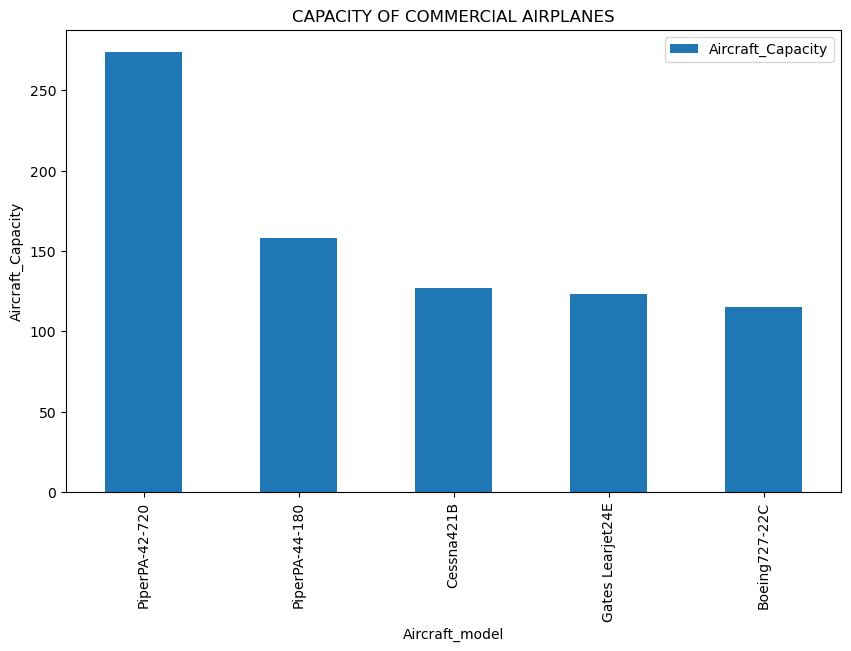

In [30]:
# Bar chart for commercial airplanes
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (10, 6)
Commercial_Airplanes.plot.bar(X, Y)
plt.title("CAPACITY OF COMMERCIAL AIRPLANES")
plt.xlabel("Aircraft_model")
plt.ylabel("Aircraft_Capacity")
plt.show()

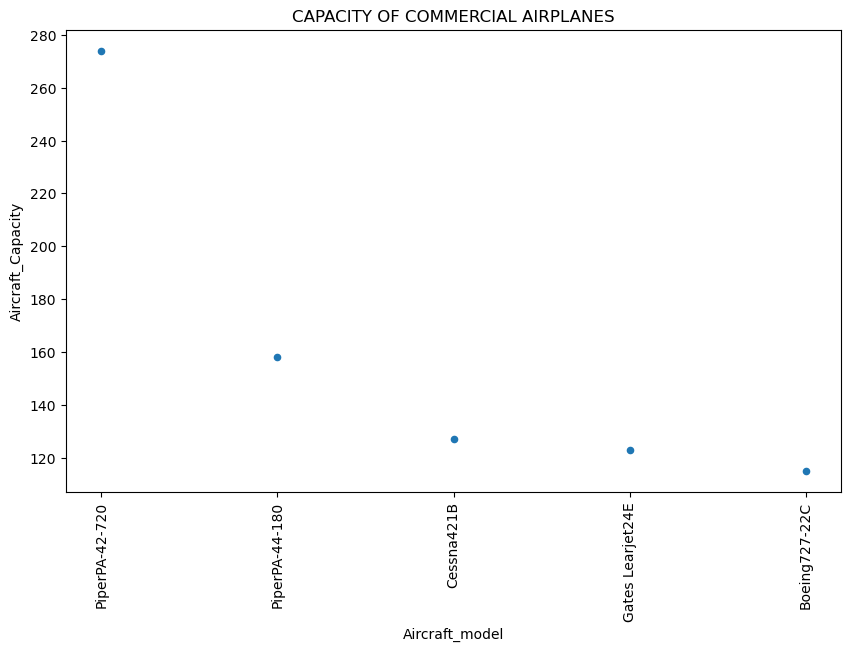

In [31]:
# Scatter plots for commercial airplanes
X = "Aircraft_model"
Y = "Aircraft_Capacity"
plt.rcParams["figure.figsize"] = (10, 6)
Commercial_Airplanes.plot.scatter(X, Y)
plt.title("CAPACITY OF COMMERCIAL AIRPLANES")
plt.xlabel("Aircraft_model")
plt.xticks(rotation=90)
plt.ylabel("Aircraft_Capacity")
plt.show()

## Findings
### There are two main categories of aircrafts
#### 1. Private Aircrafts
- Small Private Aircrafts
- Midsize Private Aircrafts
- Large Aircrafts
#### 2. Commercial Aircrafts

### 1. Private Aircrafts
#### Small Private Aircrafts
- Here are upto 15 different aircraft models to consider for purchase.
#### Midsize Private Aircrafts
- We have 3 choices of aircraft models to choose from for consideration of purchase.
#### Large Private Aircrafts
- There are 3 different aircraft models to select from for purchase consideration.
### 2. Commercial Aircrafts
- Here we found 5 different aircraft models with varying carrying capacity ranging from 274 being the largest to 115 capacity being the lowest.

   ## Limitations of the Analysis
- Assumptions made that the total uninjured represent the capacity of the aircraft.
- The data does not have the price of purchasing an aircraft.
- It does not show the maintenance cost of the aircrafts.

   ## Recommendations
#### From this Analysis, I strongly suggest that the company purchase the following aircraft models;
#### 1. Small Private Aircrafts
 - The company to consider purchasing either the Cessna 401 or Cessna 421C aircraft models due to its capacity of 6 persons which is the maximum in this category.
#### 2. Midsize Private Aircrafts
 - The company to consider the purchase of Beech B200 with a carrying capacity of 8, which is the largest in this category.
#### 3. Large Private Aircrafts
  - The company to consider the  purchase of Boeing Vertol 234ER for its carrying capacity of 19 persons, which is the highest in this category.
#### 4. Commercial Aircrafts
  -The company to consider the purchase of Piper PA-42-720 due to its carrying capacity of 274 persons, taking into account that the more the passengers the more the profits to be made.

  ## Next Steps
#### Action Plan With Specific steps to be Taken to Implement each Recommentation;
- Timelines
- Resources required
- Responsible personnel

## Evaluation and Future Improvement Ideas
- The key objectives and goals of this project are to provide insights into lower risk aircrafts, improve decision-making processes, and increase operational efficiency.
- The data used in the project is of high quality and relevance, as it is up-to-date, accurate, and directly related to the project's objectives.
- The methodologies and tools used in the data analysis process are appropriate and effective, including pandas data cleaning tools, statistical analysis and data visualization.
- The outcomes and results of the data analysis meet the project's objectives by providing actionable insights and recommendations that align with the initial goals.
- Some limitations encountered during the project include the need for more data and the need for more advanced analytical tools.
- Future improvement ideas include integrating more advanced analytics tools, having a team for such a project and providing additional training for data analysts.
## Contact Information
  LinkedIn;
  Peter Ronoh